In [17]:
import os
import pandas as pd
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd, seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',10000)

os.chdir("/Users/subinpark2/Downloads/bel/")



In [6]:
before=pd.DataFrame.from_csv('./separate_difference_table/table1_sum.csv')
#df=pd.DataFrame.from_csv("nor.csv",sep=",")
before

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,LEG251,LEG252,LEG253,LEG254,LEG255,LEG256,LEG257,LEG312,LEG321,LEG323,LEG338,LEG339,LEG342,LEG345,LEG362,LEG363,LEG364,LEG366,LEG369,LEG370,LEG378,LEG379,LEG414,LEG417,LEG421,LEG422,LEG423,LEG425,LEG435,LEG436,LEG437,LEG443,LEG508,LEG509,LEG510,LEG511,LEG512,LEG513,LEG514,LEG515,LEG516,LEG517,LEG518,LEG519,LEG520,LEG521,LEG522,LEG523,LEG533,LEG534,LEG585,LEG586,LEG587
LEG251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,47.0,47.0,49.0,49.0,48.0,49.0,49.0,49.0,49.0,49.0,49.0,48.0,7.0,48.0,50.0,48.0,50.0,50.0,50.0,48.0,50.0,50.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,50.0,48.0,47.0,48.0,48.0,49.0,48.0,50.0,48.0,48.0,50.0,50.0,50.0,49.0,12.0,12.0
LEG252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,47.0,47.0,49.0,49.0,48.0,49.0,49.0,49.0,49.0,49.0,49.0,48.0,7.0,48.0,50.0,48.0,50.0,50.0,50.0,48.0,50.0,50.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,50.0,48.0,47.0,48.0,48.0,49.0,48.0,50.0,48.0,48.0,50.0,50.0,50.0,49.0,12.0,12.0
LEG253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,47.0,47.0,49.0,49.0,48.0,49.0,49.0,49.0,49.0,49.0,49.0,48.0,7.0,48.0,50.0,48.0,50.0,50.0,50.0,48.0,50.0,50.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,50.0,48.0,47.0,48.0,48.0,49.0,48.0,50.0,48.0,48.0,50.0,50.0,50.0,49.0,12.0,12.0
LEG254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,47.0,47.0,49.0,49.0,48.0,49.0,49.0,49.0,49.0,49.0,49.0,48.0,7.0,48.0,50.0,48.0,50.0,50.0,50.0,48.0,50.0,50.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,50.0,48.0,47.0,48.0,48.0,49.0,48.0,50.0,48.0,48.0,50.0,50.0,50.0,49.0,12.0,12.0
LEG255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,47.0,47.0,49.0,49.0,48.0,49.0,49.0,49.0,49.0,49.0,49.0,48.0,7.0,48.0,50.0,48.0,50.0,50.0,50.0,48.0,50.0,50.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,50.0,48.0,47.0,48.0,48.0,49.0,48.0,50.0,48.0,48.0,50.0,50.0,50.0,49.0,12.0,12.0
LEG256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,47.0,47.0,49.0,49.0,48.0,49.0,49.0,49.0,49.0,49.0,49.0,48.0,7.0,48.0,50.0,48.0,50.0,50.0,50.0,48.0,50.0,50.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,50.0,48.0,47.0,48.0,48.0,49.0,48.0,50.0,48.0,48.0,50.0,50.0,50.0,49.0,12.0,12.0
LEG257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,47.0,47.0,49.0,49.0,48.0,49.0,49.0,49.0,49.0,49.0,49.0,48.0,7.0,48.0,50.0,48.0,50.0,50.0,50.0,48.0,50.0,50.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,50.0,48.0,47.0,48.0,48.0,49.0,48.0,50.0,48.0,48.0,50.0,50.0,50.0,49.0,12.0,12.0
LEG312,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,50.0,50.0,46.0,46.0,45.0,46.0,46.0,46.0,46.0,46.0,46.0,50.0,3.0,46.0,50.0,44.0,46.0,46.0,46.0,44.0,50.0,50.0,50.0,44.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,48.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,48.0,9.0,10.0
LEG321,47.0,47.0,47.0,47.0,47.0,47.0,47.0,50.0,0.0,0.0,49.0,49.0,49.0,49.0,47.0,47.0,47.0,47.0,50.0,5.0,50.0,48.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,6.0,6.0,6.0,6.0,6.0,48.0,6.0,0.0,6.0,6.0,49.0,6.0,49.0,6.0,6.0,50.0,50.0,50.0,49.0,50.0,47.0
LEG323,47.0,47.0,47.0,47.0,47.0,47.0,47.0,50.0,0.0,0.0,49.0,49.0,49.0,49.0,47.0,47.0,47.0,47.0,50.0,5.0,50.0,48.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,6.0,6.0,6.0,6.0,6.0,48.0,6.0,0.0,6.0,6.0,49.0,6.0,49.0,6.0,6.0,50.0,50.0,50.0,49.0,50.0,47.0


In [5]:
before2=pd.DataFrame.from_csv('./separate_difference_table2/table2_sum.csv')
before2



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,LEG251,LEG252,LEG253,LEG254,LEG255,LEG256,LEG257,LEG312,LEG321,LEG323,LEG338,LEG339,LEG342,LEG345,LEG362,LEG363,LEG364,LEG366,LEG369,LEG370,LEG378,LEG379,LEG414,LEG417,LEG421,LEG422,LEG423,LEG425,LEG435,LEG436,LEG437,LEG443,LEG508,LEG509,LEG510,LEG511,LEG512,LEG513,LEG514,LEG515,LEG516,LEG517,LEG518,LEG519,LEG520,LEG521,LEG522,LEG523,LEG533,LEG534,LEG585,LEG586,LEG587
LEG251,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG252,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG253,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG254,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG255,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG256,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG257,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG312,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG321,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
LEG323,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0


,Unnamed: 0,LEG251,LEG252,LEG253,LEG254,LEG255,LEG256,LEG257,LEG312,LEG321,LEG323,LEG338,LEG339,LEG342,LEG345,LEG362,LEG363,LEG364,LEG366,LEG369,LEG370,LEG378,LEG379,LEG414,LEG417,LEG421,LEG422,LEG423,LEG425,LEG435,LEG436,LEG437,LEG443,LEG508,LEG509,LEG510,LEG511,LEG512,LEG513,LEG514,LEG515,LEG516,LEG517,LEG518,LEG519,LEG520,LEG521,LEG522,LEG523,LEG533,LEG534,LEG585,LEG586,LEG587
0,LEG251,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
1,LEG252,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2,LEG253,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
3,LEG254,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
4,LEG255,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
5,LEG256,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
6,LEG257,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
7,LEG312,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
8,LEG321,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
9,LEG323,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0


In [7]:
df=before/before2

In [13]:
linkage_matrix = linkage(df,'average')
dendrogram(
    linkage_matrix,
    leaf_rotation=0,
    leaf_font_size=3,
    labels=df.columns,
    orientation='left',
    show_leaf_counts=True,
    #color_threshold=0.3
)
plt.title('Hierarchical Clustering Dendrogram')
#plt.figure(figsize=(300,300))
#plt.show()
#color_threshold=None
pp=PdfPages('test_bel.pdf')
pp.savefig()
pp.close()



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [14]:
sns.set(font="monospace")
sns.set(font_scale=0.5) 
linkage = hc.linkage(sp.distance.squareform(df), method='average')
sns.clustermap(df, row_linkage=linkage, col_linkage=linkage)
pp2=PdfPages('heatmap.pdf')
pp2.savefig()
pp2.close()



In [20]:
tablef=open("dic4_new .txt")
tablef=pd.DataFrame.from_csv(tablef,sep="\t",header=None,index_col=False)
tablef.columns=['ID','Genome','GenomeCount']
tablef=tablef.sort_values(by='GenomeCount',ascending=False)
tablef

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,ID,Genome,GenomeCount
0,"['lpg1737_1', 'lpg2175_3', 'lpg1452_9', 'lpg2827_8', 'lpg2339_1', 'lpg2933_3', 'lpg0116_1', 'lpg0461_4', 'lpg1682_8', 'lpg2869_7', 'lpg0212_7', 'lpg0028_6', 'lpg1994_3', 'lpg1178_4', 'lpg2622_9', 'lpg1511_6', 'lpg0656_6', 'lpg1782_5', 'lpg0078_9', 'lpg1206_4', 'lpg0330_2', 'lpg2039_7', 'lpg2231_2', 'lpg1340_1', 'lpg1830_2', 'lpg0712_4', 'lpg1882_6', 'lpg1636_7', 'lpg0287_3', 'lpg2698_6', 'lpg1283_5', 'lpg2795_6', 'lpg2404_7', 'lpg0888_7', 'lpg0356_1', 'lpg0956_8', 'lpg0432_3', 'lpg0785_2', 'lpg2461_3', 'lpg2577_3', 'lpg2516_4', 'lpg2743_5', 'lpg1144_7', 'lpg0513_7', 'lpg0577_5', 'lpg1398_6', 'lpg0840_5', 'lpg2280_6', 'lpg2999_1', 'lpg1566_2']","['LEG510', 'LEG509', 'LEG516', 'LEG521', 'LEG512', 'LEG511', 'LEG522', 'LEG514', 'LEG517', 'LEG508', 'LEG519']",11
8,"['lpg1737_6', 'lpg2175_1', 'lpg1452_3', 'lpg2827_1', 'lpg2339_5', 'lpg2933_9', 'lpg0116_2', 'lpg0461_7', 'lpg1682_1', 'lpg2869_4', 'lpg0212_3', 'lpg0028_8', 'lpg1994_1', 'lpg1178_5', 'lpg2622_2', 'lpg1511_3', 'lpg0656_1', 'lpg1782_4', 'lpg0078_1', 'lpg1206_3', 'lpg0330_7', 'lpg2039_1', 'lpg2231_1', 'lpg1340_2', 'lpg1830_3', 'lpg0712_1', 'lpg1882_1', 'lpg1636_9', 'lpg0287_6', 'lpg2698_1', 'lpg1283_2', 'lpg2795_5', 'lpg2404_2', 'lpg0888_7', 'lpg0356_5', 'lpg0956_4', 'lpg0432_4', 'lpg0785_8', 'lpg2461_2', 'lpg2577_2', 'lpg2516_6', 'lpg2743_7', 'lpg1144_5', 'lpg0513_2', 'lpg0577_7', 'lpg1398_11', 'lpg0840_5', 'lpg2280_1', 'lpg2999_5', 'lpg1566_7']","['LEG252', 'LEG257', 'LEG251', 'LEG255', 'LEG254', 'LEG256', 'LEG253']",7
14,"['lpg1737_8', 'lpg2175_4', 'lpg1452_7', 'lpg2827_5', 'lpg2339_4', 'lpg2933_6', 'lpg0116_8', 'lpg0461_1', 'lpg1682_1', 'lpg2869_3', 'lpg0212_1', 'lpg0028_2', 'lpg1994_7', 'lpg1178_1', 'lpg2622_9', 'lpg1511_1', 'lpg0656_4', 'lpg1782_1', 'lpg0078_3', 'lpg1206_7', 'lpg0330_6', 'lpg2039_9', 'lpg2231_7', 'lpg1340_4', 'lpg1830_2', 'lpg0712_6', 'lpg1882_3', 'lpg1636_2', 'lpg0287_1', 'lpg2698_9', 'lpg1283_10', 'lpg2795_2', 'lpg2404_5', 'lpg0888_6', 'lpg0356_6', 'lpg0956_8', 'lpg0432_1', 'lpg0785_7', 'lpg2461_5', 'lpg2577_8', 'lpg2516_1', 'lpg2743_1', 'lpg1144_7', 'lpg0513_4', 'lpg0577_3', 'lpg1398_1', 'lpg0840_3', 'lpg2280_4', 'lpg2999_6', 'lpg1566_4']","['LEG366', 'LEG363', 'LEG362', 'LEG364']",4
1,"['lpg1737_1', 'lpg2175_3', 'lpg1452_9', 'lpg2827_8', 'lpg2339_1', 'lpg2933_3', 'lpg0116_1', 'lpg0461_4', 'lpg1682_8', 'lpg2869_7', 'lpg0212_7', 'lpg0028_7', 'lpg1994_3', 'lpg1178_4', 'lpg2622_9', 'lpg1511_6', 'lpg0656_6', 'lpg1782_5', 'lpg0078_9', 'lpg1206_4', 'lpg0330_3', 'lpg2039_8', 'lpg2231_2', 'lpg1340_1', 'lpg1830_4', 'lpg0712_4', 'lpg1882_6', 'lpg1636_7', 'lpg0287_7', 'lpg2698_6', 'lpg1283_5', 'lpg2795_6', 'lpg2404_7', 'lpg0888_7', 'lpg0356_1', 'lpg0956_8', 'lpg0432_3', 'lpg0785_8', 'lpg2461_3', 'lpg2577_3', 'lpg2516_4', 'lpg2743_5', 'lpg1144_7', 'lpg0513_7', 'lpg0577_5', 'lpg1398_6', 'lpg0840_5', 'lpg2280_6', 'lpg2999_1', 'lpg1566_2']","['LEG323', 'LEG515', 'LEG321']",3
15,"['lpg1737_8', 'lpg2175_4', 'lpg1452_7', 'lpg2827_4', 'lpg2339_4', 'lpg2933_6', 'lpg0116_8', 'lpg0461_2', 'lpg1682_1', 'lpg2869_3', 'lpg0212_1', 'lpg0028_2', 'lpg1994_7', 'lpg1178_1', 'lpg2622_7', 'lpg1511_1', 'lpg0656_4', 'lpg1782_6', 'lpg0078_3', 'lpg1206_7', 'lpg0330_6', 'lpg2039_9', 'lpg2231_7', 'lpg1340_4', 'lpg1830_2', 'lpg0712_7', 'lpg1882_3', 'lpg1636_2', 'lpg0287_1', 'lpg2698_9', 'lpg1283_10', 'lpg2795_2', 'lpg2404_5', 'lpg0888_6', 'lpg0356_6', 'lpg0956_1', 'lpg0432_2', 'lpg0785_7', 'lpg2461_5', 'lpg2577_8', 'lpg2516_1', 'lpg2743_1', 'lpg0513_4', 'lpg0577_3', 'lpg1398_2', 'lpg0840_3', 'lpg2280_4', 'lpg2999_6', 'lpg1566_4']","['LEG443', 'LEG417', 'LEG425']",3
3,"['lpg1737_2', 'lpg2175_6', 'lpg1452_4', 'lpg2827_6', 'lpg2339_2', 'lpg2933_1', 'lpg0116_3', 'lpg0461_1', 'lpg1682_9', 'lpg2869_1', 'lpg0212_5', 'lpg0028_1', 'lpg1994_6', 'lpg1178_7', 'lpg2622_4', 'lpg1511_5', 'lpg0656_3', 'lpg1782_6', 'lpg0078_7', 'lpg1206_1', 'lpg0330_5', 'lpg2039_10', 'lpg2231_3', 'lpg1340_4', 'lpg1830_2', 'lpg0712_2', 'lpg1882_4', 'lpg1636_10', 'lpg0287_2', 'lpg2698_3', 'lpg1283

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


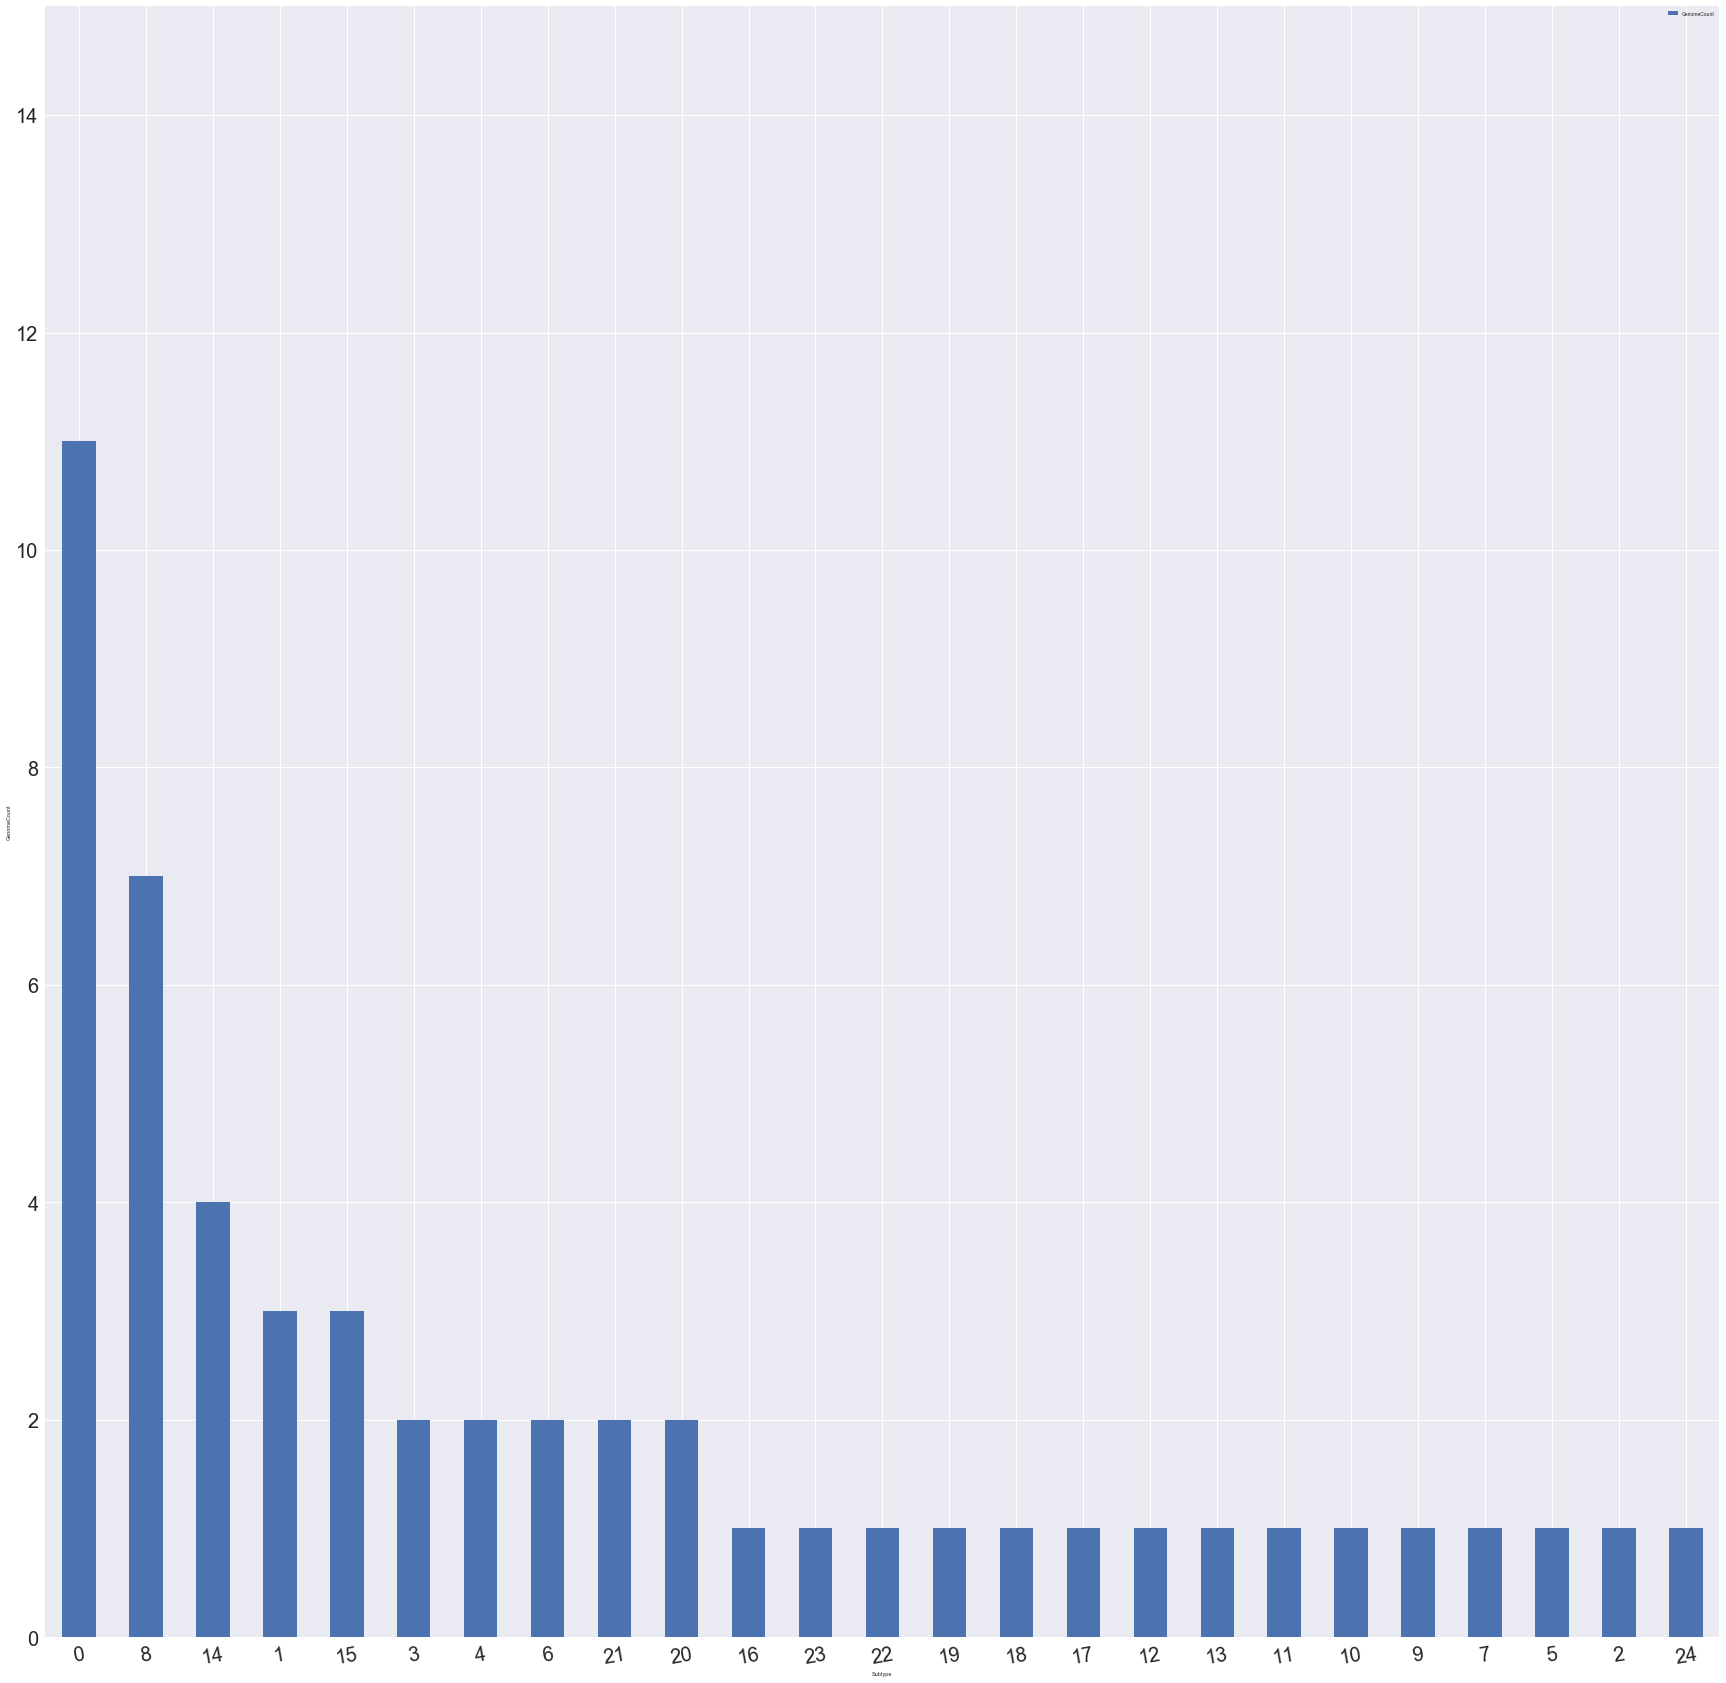

In [25]:
tablef=open("dic4_new .txt")
tablef=pd.DataFrame.from_csv(tablef,sep="\t",header=None,index_col=False)
tablef.columns=['ID','Genome','GenomeCount']
tablef=tablef.sort_values(by='GenomeCount',ascending=False)
tablef.plot.bar(xlim=(0,55),ylim=(0,15),fontsize=20,figsize=(30,30),rot=10)
plt.xlabel('Subtype')
plt.ylabel('GenomeCount')
plt.show()